# Regressão Linear Multivariada - Trabalho

## Estudo de caso: Qualidade de Vinhos

Nesta trabalho, treinaremos um modelo de regressão linear usando descendência de gradiente estocástico no conjunto de dados da Qualidade do Vinho. O exemplo pressupõe que uma cópia CSV do conjunto de dados está no diretório de trabalho atual com o nome do arquivo *winequality-white.csv*.

O conjunto de dados de qualidade do vinho envolve a previsão da qualidade dos vinhos brancos em uma escala, com medidas químicas de cada vinho. É um problema de classificação multiclasse, mas também pode ser enquadrado como um problema de regressão. O número de observações para cada classe não é equilibrado. Existem 4.898 observações com 11 variáveis de entrada e 1 variável de saída. Os nomes das variáveis são os seguintes:

1. Fixed acidity.
2. Volatile acidity.
3. Citric acid.
4. Residual sugar.
5. Chlorides.
6. Free sulfur dioxide. 
7. Total sulfur dioxide. 
8. Density.
9. pH.
10. Sulphates.
11. Alcohol.
12. Quality (score between 0 and 10).

O desempenho de referencia de predição do valor médio é um RMSE de aproximadamente 0.148 pontos de qualidade.

Utilize o exemplo apresentado no tutorial e altere-o de forma a carregar os dados e analisar a acurácia de sua solução. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def predict(row, coefficients):
  yhat = coefficients[0]
  for i in range(len(row)-1):
    yhat += coefficients[i + 1] * row[i]
  return yhat

In [2]:
def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    err = np.array([])
    print ('Coeficiente Inicial={0}' % (coef))
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            sum_error += error**2
            coef[0] = coef[0] - l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i] 
        print(('epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error)))
        err = np.append(err, sum_error)
        #print(err)
    return [coef,err]


## utilizando o dataset do tutorial e mudando rate e épocas

In [3]:
dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
l_rate = 0.01
n_epoch = 100
coef = coefficients_sgd(dataset, l_rate, n_epoch)
print("coeficientes finais: {:s}".format(coef[0]))

Coeficiente Inicial={0}
epoch=0, lrate=0.010, error=33.621
epoch=1, lrate=0.010, error=10.912
epoch=2, lrate=0.010, error=4.855
epoch=3, lrate=0.010, error=3.255
epoch=4, lrate=0.010, error=2.841
epoch=5, lrate=0.010, error=2.738
epoch=6, lrate=0.010, error=2.715
epoch=7, lrate=0.010, error=2.711
epoch=8, lrate=0.010, error=2.711
epoch=9, lrate=0.010, error=2.712
epoch=10, lrate=0.010, error=2.712
epoch=11, lrate=0.010, error=2.712
epoch=12, lrate=0.010, error=2.712
epoch=13, lrate=0.010, error=2.712
epoch=14, lrate=0.010, error=2.712
epoch=15, lrate=0.010, error=2.712
epoch=16, lrate=0.010, error=2.712
epoch=17, lrate=0.010, error=2.712
epoch=18, lrate=0.010, error=2.712
epoch=19, lrate=0.010, error=2.712
epoch=20, lrate=0.010, error=2.712
epoch=21, lrate=0.010, error=2.711
epoch=22, lrate=0.010, error=2.711
epoch=23, lrate=0.010, error=2.711
epoch=24, lrate=0.010, error=2.711
epoch=25, lrate=0.010, error=2.711
epoch=26, lrate=0.010, error=2.711
epoch=27, lrate=0.010, error=2.711
epoc

TypeError: unsupported format string passed to list.__format__

## dataset do trabalho (wine)

In [4]:
dataset = pd.read_csv("winequality-white.csv", delimiter=";")

In [5]:
#normalizando os dados
dataset = MinMaxScaler().fit_transform(dataset.values[:,:-1])

In [6]:
#coeficientes finais
[coef,err] = coefficients_sgd(dataset, l_rate, n_epoch)
print(coef)

Coeficiente Inicial={0}
epoch=0, lrate=0.010, error=152.603
epoch=1, lrate=0.010, error=112.296
epoch=2, lrate=0.010, error=98.784
epoch=3, lrate=0.010, error=91.969
epoch=4, lrate=0.010, error=87.507
epoch=5, lrate=0.010, error=84.078
epoch=6, lrate=0.010, error=81.209
epoch=7, lrate=0.010, error=78.695
epoch=8, lrate=0.010, error=76.433
epoch=9, lrate=0.010, error=74.358
epoch=10, lrate=0.010, error=72.432
epoch=11, lrate=0.010, error=70.625
epoch=12, lrate=0.010, error=68.918
epoch=13, lrate=0.010, error=67.298
epoch=14, lrate=0.010, error=65.753
epoch=15, lrate=0.010, error=64.275
epoch=16, lrate=0.010, error=62.858
epoch=17, lrate=0.010, error=61.497
epoch=18, lrate=0.010, error=60.189
epoch=19, lrate=0.010, error=58.931
epoch=20, lrate=0.010, error=57.718
epoch=21, lrate=0.010, error=56.550
epoch=22, lrate=0.010, error=55.424
epoch=23, lrate=0.010, error=54.338
epoch=24, lrate=0.010, error=53.291
epoch=25, lrate=0.010, error=52.280
epoch=26, lrate=0.010, error=51.305
epoch=27, lr

In [52]:
#erro em cada época
print (err)

[ 152.60307094  112.29598227   98.78391803   91.96920704   87.50716255
   84.07809435   81.20870395   78.69521151   76.43253316   74.35822889
   72.43167366   70.62500627   68.91849983   67.29786382   65.75253563
   64.27454832   62.85776201   61.49733527   60.18935865   58.93059896
   57.71831978   56.55015482   55.42401791   54.33803867   53.29051611
   52.27988491   51.30469067   50.36357159   49.45524462   48.57849504
   47.73216837   46.91516399   46.12643012   45.36495975   44.62978724
   43.91998549   43.23466358   42.57296461   41.93406395   41.31716754
   40.72151047   40.14635563   39.5909925    39.05473598   38.5369254
   38.0369235    37.5541155    37.08790824   36.63772937   36.20302656
   35.78326672   35.37793534   34.9865358    34.60858871   34.24363128
   33.89121676   33.55091384   33.22230612   32.90499156   32.59858201
   32.3027027    32.01699176   31.7410998    31.47468946   31.21743499
   30.96902183   30.72914627   30.49751503   30.2738449    30.05786244
   29.8

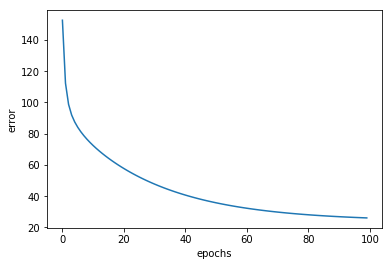

In [7]:
#plot dos erros x épocas
plt.plot(err)
plt.ylabel("error")
plt.xlabel("epochs")
plt.show()